In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import wavfile

In [2]:
def espiro_csv (archivo,serie):
    # open file and then strip out extra characters
    spiro=pd.read_csv(archivo+".csv")


    # plot the data
    plt.plot(spiro.iloc[:,0+((serie-1)*3)],spiro.iloc[:,1+((serie-1)*3)],label="Caudal")
    plt.plot(spiro.iloc[:,0+((serie-1)*3)],spiro.iloc[:,2+((serie-1)*3)],label="Volumen")
    plt.title(archivo+" serie "+str(serie))
    plt.legend()
    plt.xlabel('tiempo (s)')
    plt.ylabel('volumen caudal (L/s)')
    #plt.set_aspect('equal',adjustable='box') #Guarda la proporcion entre los ejes x y y.
    plt.show()

In [3]:
def espiro (archivo): 
    # open file
    spiro=pd.read_csv(archivo+".csv")
    
    # Calculate the number of series in the file
    n=int(np.shape(spiro)[1]/3)
    print(n)
    
    # Plot the data 
    fig, axs = plt.subplots(nrows=int(np.ceil(n/2)), ncols=2, sharex=True, sharey=True, figsize=(18,int(2.3*14))) 
    for i in range(0,n):
        serie=i+1
        row=int(i/2)
        col=i%2

        axs[row, col].plot(spiro.iloc[:,0+((serie-1)*3)],-spiro.iloc[:,1+((serie-1)*3)],label="Caudal")
        axs[row, col].plot(spiro.iloc[:,0+((serie-1)*3)],spiro.iloc[:,2+((serie-1)*3)],label="Volumen")
        axs[row, col].legend()
        axs[row, col].set_xlabel('tiempo (s)')
        axs[row, col].set_ylabel('volumen caudal (L/s)')
        axs[row, col].set_title(archivo+" serie "+str(serie))
        ax2=axs[row,col].twinx()
        ax2.set_ylabel('Volumen (L)')
        ax2.set_ylim(-11,7)
        axs[row,col].set_ylim(-11,7)

14


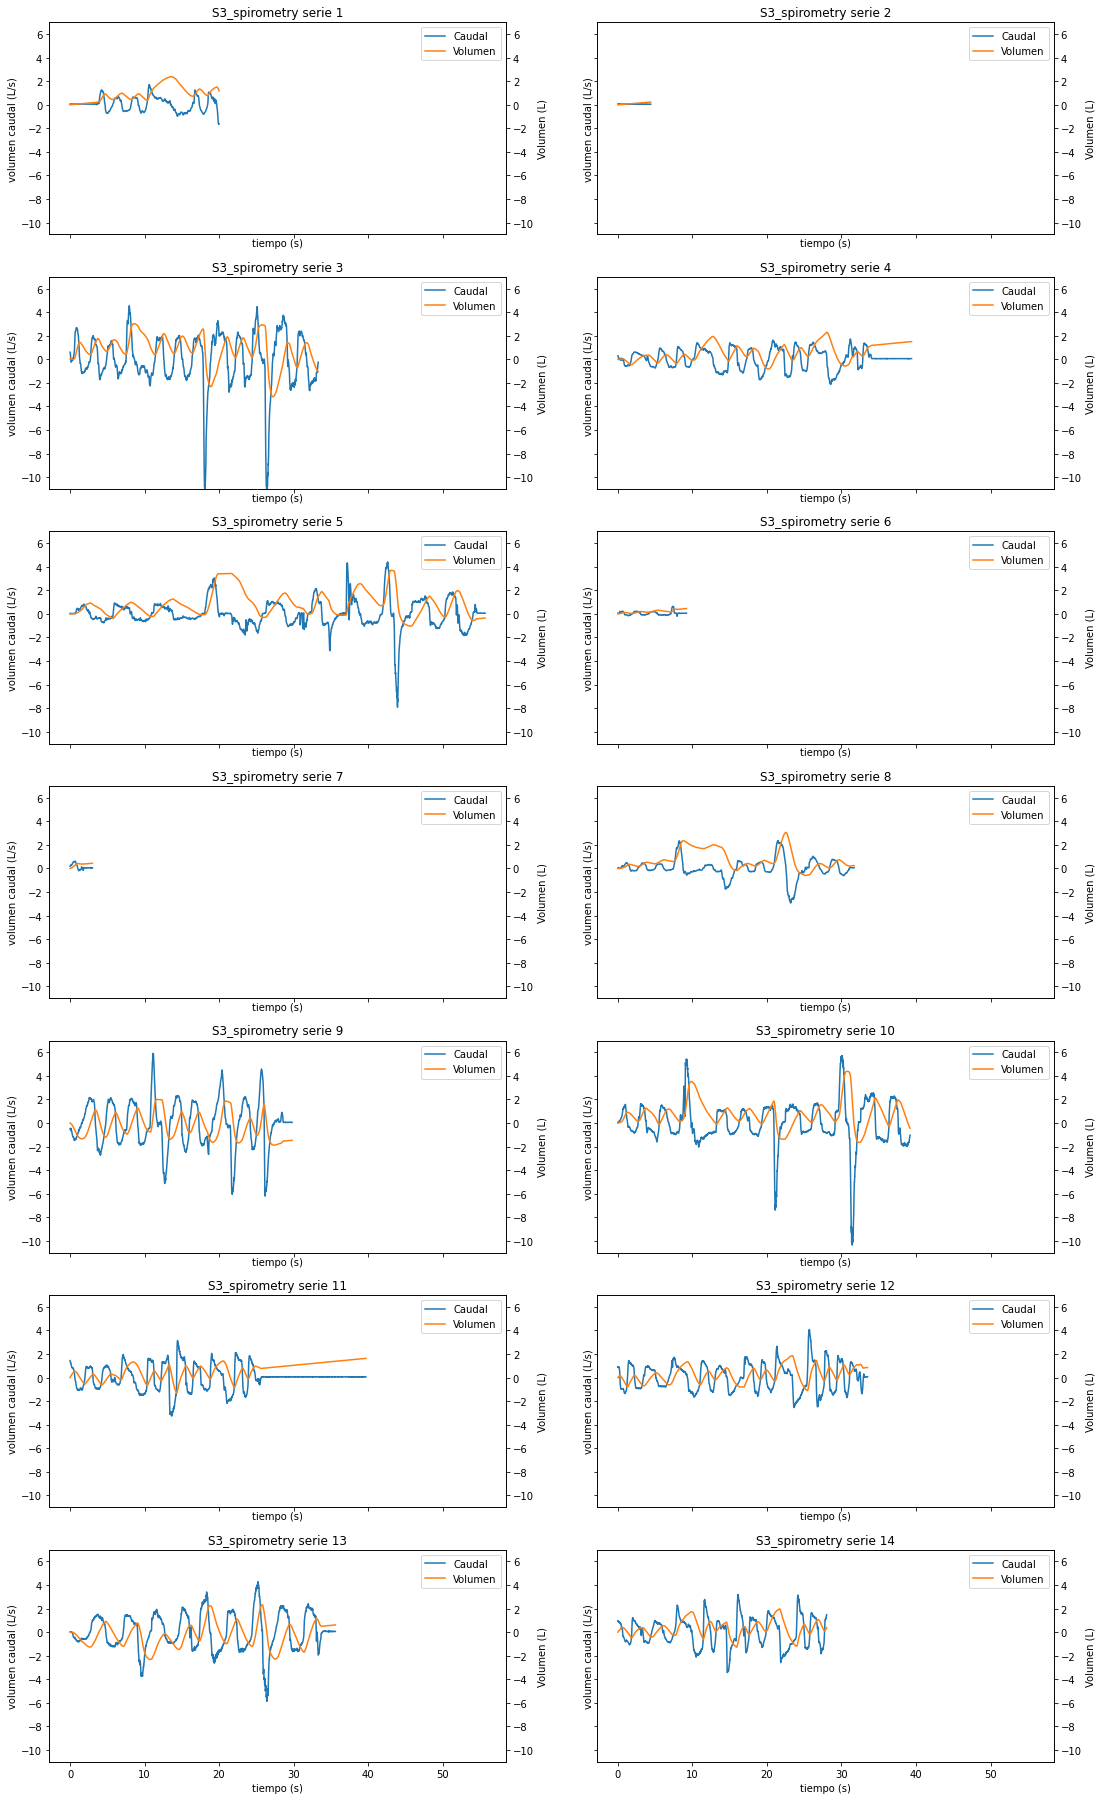

In [4]:
espiro("S3_spirometry")

13


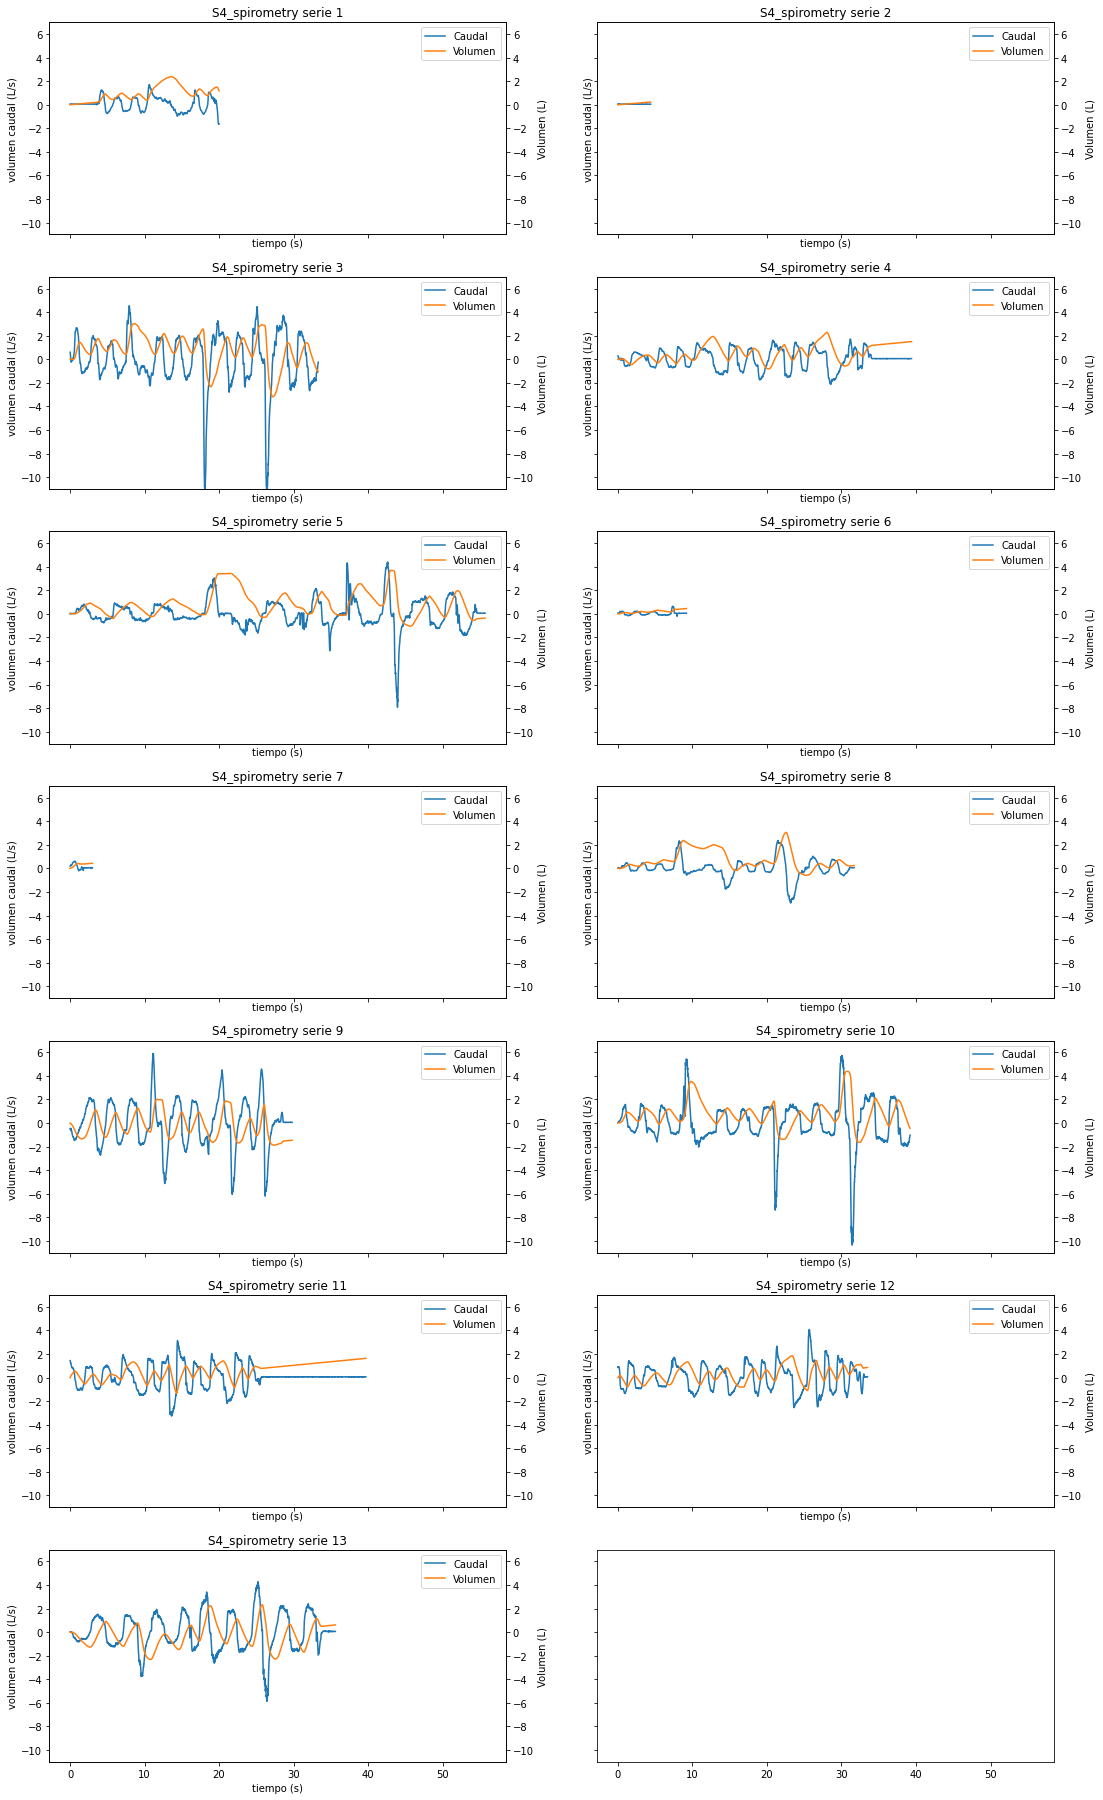

In [5]:
espiro("S4_spirometry")

10


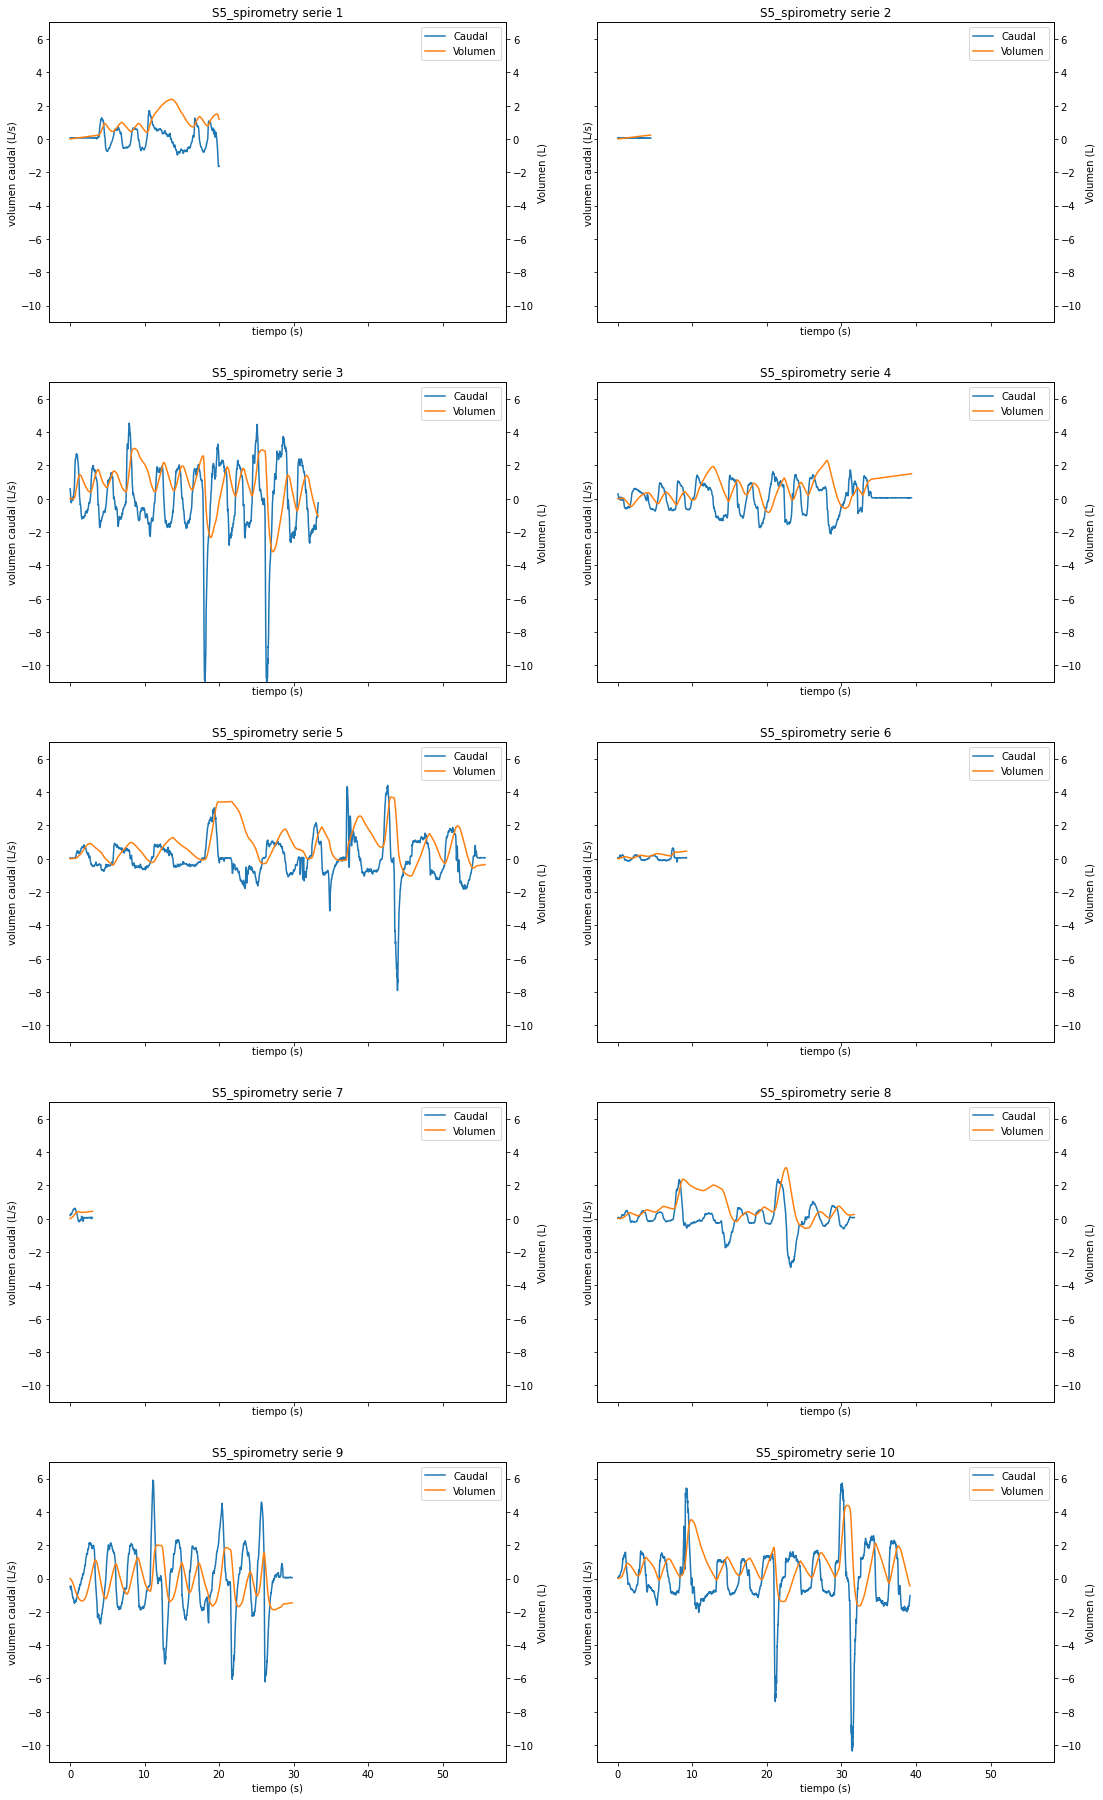

In [6]:
espiro("S5_spirometry")

In [7]:
def EMG(subject):
    samplerate, data = wavfile.read('S'+str(subject)+'_EMG.wav')
    
    
    length = data.shape[0] / samplerate
    print(length)
    time = np.linspace(0., length, data.shape[0])
    
    plt.plot(time, data)
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.title("Subject "+str(subject))
    plt.show()

/var/folders/xc/z05tb2yj5_s30q5tlm9f2xs40000gn/T/ipykernel_8830/2095577004.py:2: WavFileWarning: Reached EOF prematurely; finished at 2587692 bytes, expected 10350636 bytes from header.
  samplerate, data = wavfile.read('S'+str(subject)+'_EMG.wav')


29.3384126984127


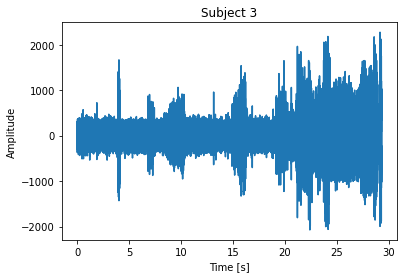

In [8]:
EMG(3)

## Nota: 
La medición parece corresponder a la serie 9 por el tiempo de duración ($\approx 30$ s).

/var/folders/xc/z05tb2yj5_s30q5tlm9f2xs40000gn/T/ipykernel_8830/2095577004.py:2: WavFileWarning: Reached EOF prematurely; finished at 3254316 bytes, expected 13017132 bytes from header.
  samplerate, data = wavfile.read('S'+str(subject)+'_EMG.wav')


36.89650793650794


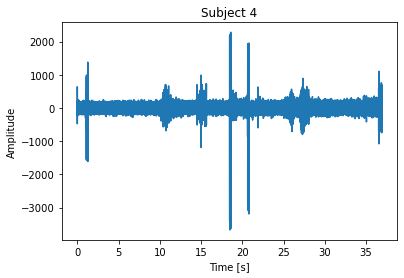

In [9]:
EMG(4)

## Nota: 
La medición parece corresponder a la serie 13 por el tiempo de duración ($\approx 37$ s)

/var/folders/xc/z05tb2yj5_s30q5tlm9f2xs40000gn/T/ipykernel_8830/2095577004.py:2: WavFileWarning: Reached EOF prematurely; finished at 3576876 bytes, expected 14307372 bytes from header.
  samplerate, data = wavfile.read('S'+str(subject)+'_EMG.wav')


40.553650793650796


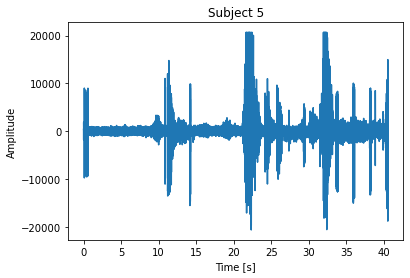

In [10]:
EMG(5)

## Nota: 
La medición parece corresponder a la serie 10 por el tiempo de duración ($\approx 40$ s)

## Envolve

In [82]:
def EMG_env(subject,low_cut):
    samplerate, data = wavfile.read('S'+str(subject)+'_EMG.wav')
    
    
    length = data.shape[0] / samplerate
    time = np.linspace(0., length, data.shape[0])
    
    # Correction
    data=abs(data)
    
    # FFT to the data
    data_fft=np.fft.rfftn(data)
    
    #Finding the baseline
    baseline_fft=np.zeros(len(data_fft))
    baseline_fft[0]=np.real(data_fft[0])
    baseline=np.fft.irfftn(baseline_fft)
    
    #High-pass filter
    for i in range(int(low_cut*length), len(data_fft)):
        data_fft[i]=0
    data_2=np.fft.irfftn(data_fft)
    
    #Find the scaling factor
    sf=max(data)/max(data_2)
    
    # Plot the data 
    fig, axs = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(18,9)) 
    
    axs[0].plot(time, data)
    axs[0].plot(time, sf*baseline)
    axs[0].plot(time, sf*data_2)
    axs[0].set_xlabel("Time [s]")
    axs[0].set_ylabel("Amplitude[u]")
    axs[0].set_title("Subject "+str(subject))
    
    axs[1].bar(["Baseline","Activation"], [baseline[0],max(data_2)])
    axs[1].set_ylabel("Amplitude[UU]")
    bl=baseline[0]
    relative_act=max(data_2)/ bl
    return data_2,relative_act

/var/folders/xc/z05tb2yj5_s30q5tlm9f2xs40000gn/T/ipykernel_8830/3086212897.py:2: WavFileWarning: Reached EOF prematurely; finished at 2587692 bytes, expected 10350636 bytes from header.
  samplerate, data = wavfile.read('S'+str(subject)+'_EMG.wav')


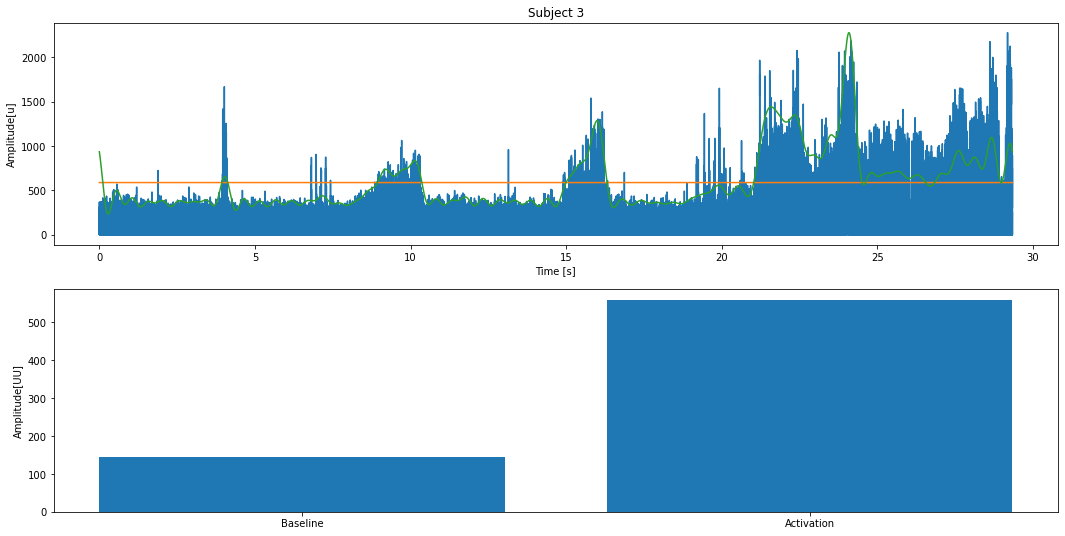

In [86]:
BL_01=EMG_env(3,2)[1]

/var/folders/xc/z05tb2yj5_s30q5tlm9f2xs40000gn/T/ipykernel_8830/3086212897.py:2: WavFileWarning: Reached EOF prematurely; finished at 3254316 bytes, expected 13017132 bytes from header.
  samplerate, data = wavfile.read('S'+str(subject)+'_EMG.wav')


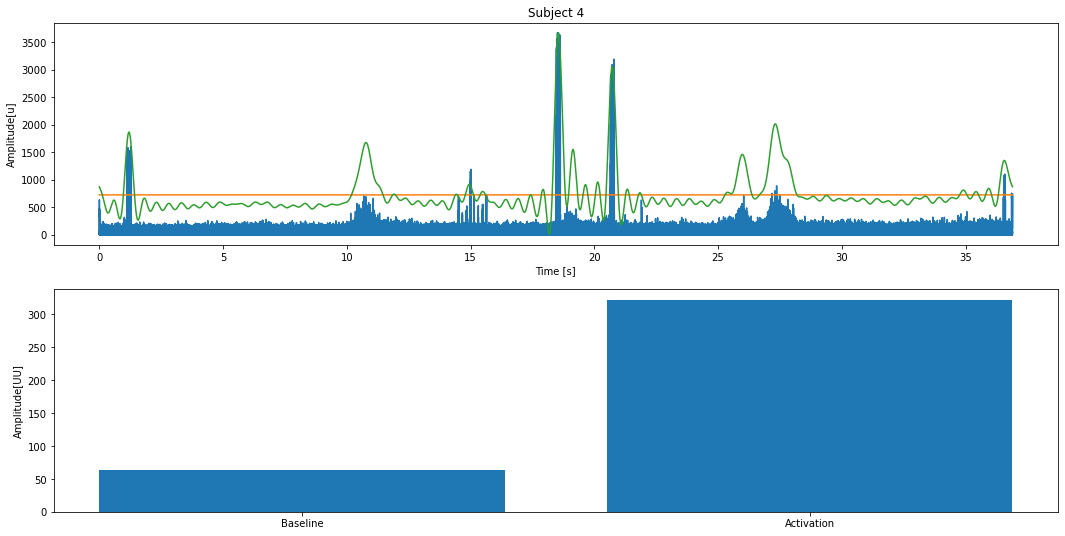

In [87]:
BL_02=EMG_env(4,2)[1]

/var/folders/xc/z05tb2yj5_s30q5tlm9f2xs40000gn/T/ipykernel_8830/3086212897.py:2: WavFileWarning: Reached EOF prematurely; finished at 3576876 bytes, expected 14307372 bytes from header.
  samplerate, data = wavfile.read('S'+str(subject)+'_EMG.wav')


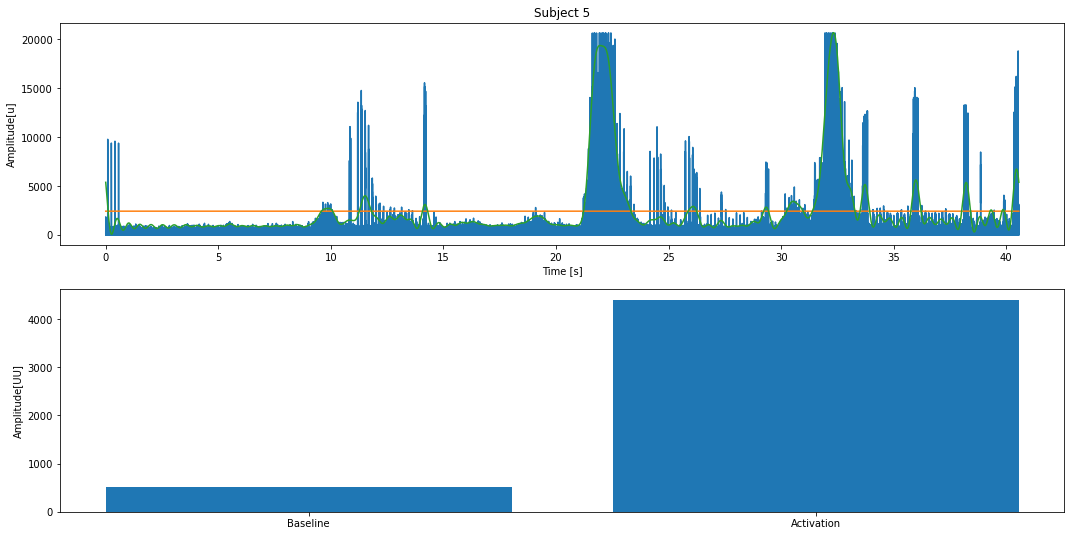

In [88]:
BL_03=EMG_env(5,2)[1]

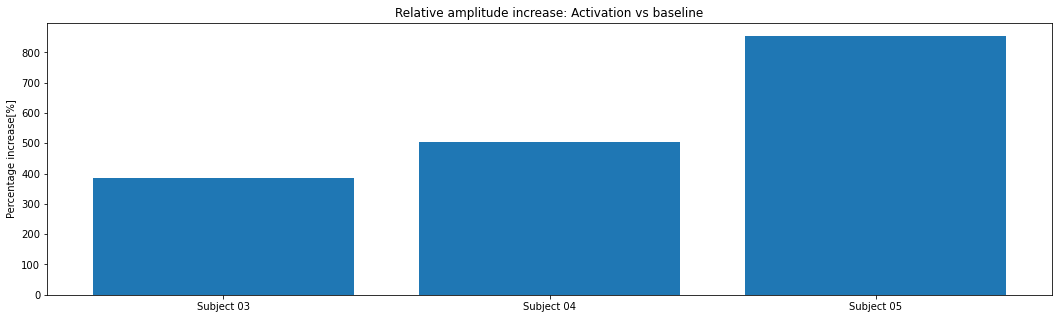

In [93]:
fig=plt.figure(figsize=(18,5))
plt.bar(["Subject 03","Subject 04","Subject 05"],[BL_01*100,BL_02*100,BL_03*100])
plt.title("Relative amplitude increase: Activation vs baseline")
plt.ylabel("Percentage increase[%]")
plt.show()

## Plot EMG+Spirometry

In [13]:
def spiro_emg (subject,series,low_cut=2,emg_offset=0): 
    # open files
    spiro=pd.read_csv("S"+str(subject)+"_spirometry.csv")
    samplerate, data = wavfile.read('S'+str(subject)+'_EMG.wav')
    
    # Calculate the number of series in the file
    n=int(np.shape(spiro)[1]/3)
    
    # Create a time array
    length = data.shape[0] / samplerate
    print(length)
    time = np.linspace(0.+emg_offset, length+emg_offset, data.shape[0])
    
    # Correction of EMG
    data=abs(data)
    
    #Low-pass filter on EMG
    data_fft=np.fft.rfftn(data)
    for i in range(int(low_cut*length), len(data_fft)):
        data_fft[i]=0
    data_2=np.fft.irfftn(data_fft)
    sf=max([max(-spiro.iloc[:,1+((series-1)*3)]), max(2*spiro.iloc[:,2+((series-1)*3)])])/max(data_2)
    
    # Plot the data 
    fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=False, figsize=(18,9)) 
    
    axs[0].plot(spiro.iloc[:,0+((series-1)*3)],-spiro.iloc[:,1+((series-1)*3)],label="Caudal")
    axs[0].plot(spiro.iloc[:,0+((series-1)*3)],2*spiro.iloc[:,2+((series-1)*3)],label="Volumen")
    axs[0].legend()
    axs[0].set_xlabel('tiempo (s)')
    axs[0].set_ylabel('volumen caudal (L/s)')
    axs[0].set_title("Subject "+str(subject)+" series "+str(series))
    ax2=axs[0].twinx()
    ax2.set_ylabel('Volumen (L)')
    ax2.set_ylim(-7,7)
    axs[0].set_ylim(-7,7)
    
    axs[1].plot(time, sf*data_2)
    axs[1].set_xlabel('tiempo (s)')
    axs[1].set_ylabel('Amplitude (uV?)')

### Subject 3:

/var/folders/xc/z05tb2yj5_s30q5tlm9f2xs40000gn/T/ipykernel_8830/2870609375.py:4: WavFileWarning: Reached EOF prematurely; finished at 2587692 bytes, expected 10350636 bytes from header.
  samplerate, data = wavfile.read('S'+str(subject)+'_EMG.wav')


29.3384126984127


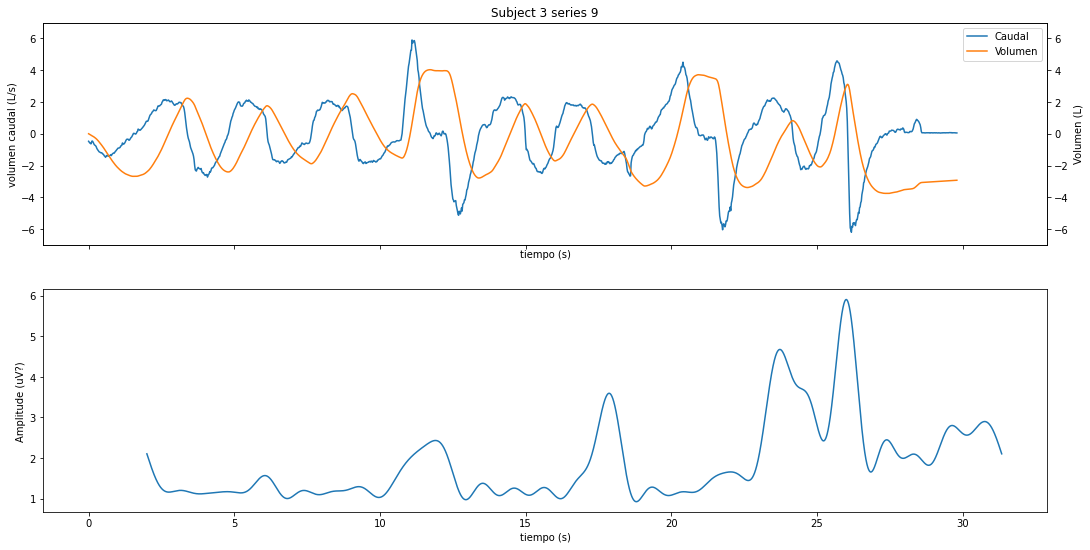

In [14]:
spiro_emg (3,9,low_cut=1, emg_offset=2)

/var/folders/xc/z05tb2yj5_s30q5tlm9f2xs40000gn/T/ipykernel_8830/2870609375.py:4: WavFileWarning: Reached EOF prematurely; finished at 2587692 bytes, expected 10350636 bytes from header.
  samplerate, data = wavfile.read('S'+str(subject)+'_EMG.wav')


29.3384126984127


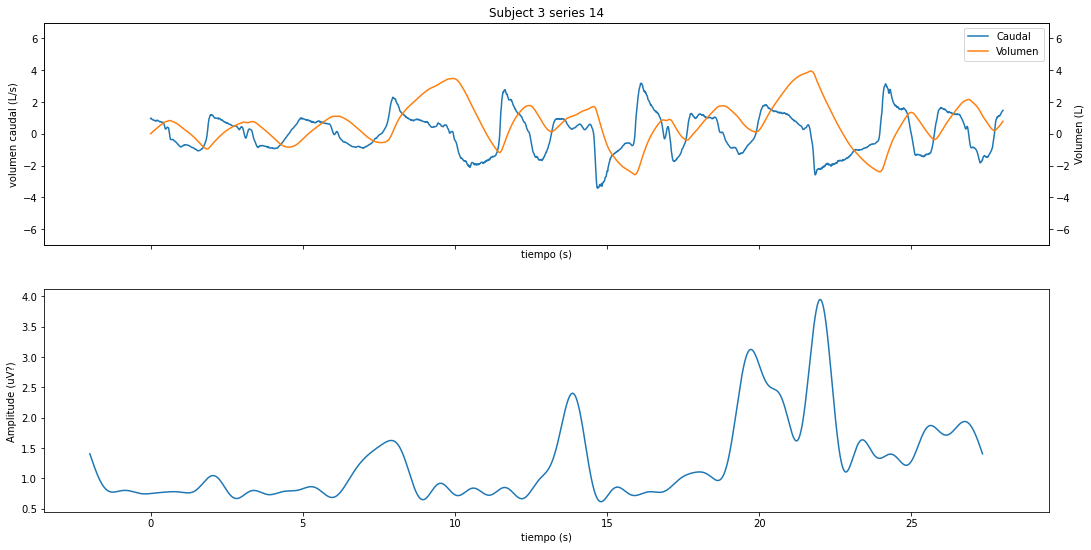

In [15]:
spiro_emg (3,14,low_cut=1,emg_offset=-2)

### Notes: 
As it can be observed in the last 2 graphs, the EMG recording looks similar to the spirometry series 14 (instead of the series 9 as it was theorized).

### Subject 4:

/var/folders/xc/z05tb2yj5_s30q5tlm9f2xs40000gn/T/ipykernel_8830/2870609375.py:4: WavFileWarning: Reached EOF prematurely; finished at 3254316 bytes, expected 13017132 bytes from header.
  samplerate, data = wavfile.read('S'+str(subject)+'_EMG.wav')


36.89650793650794


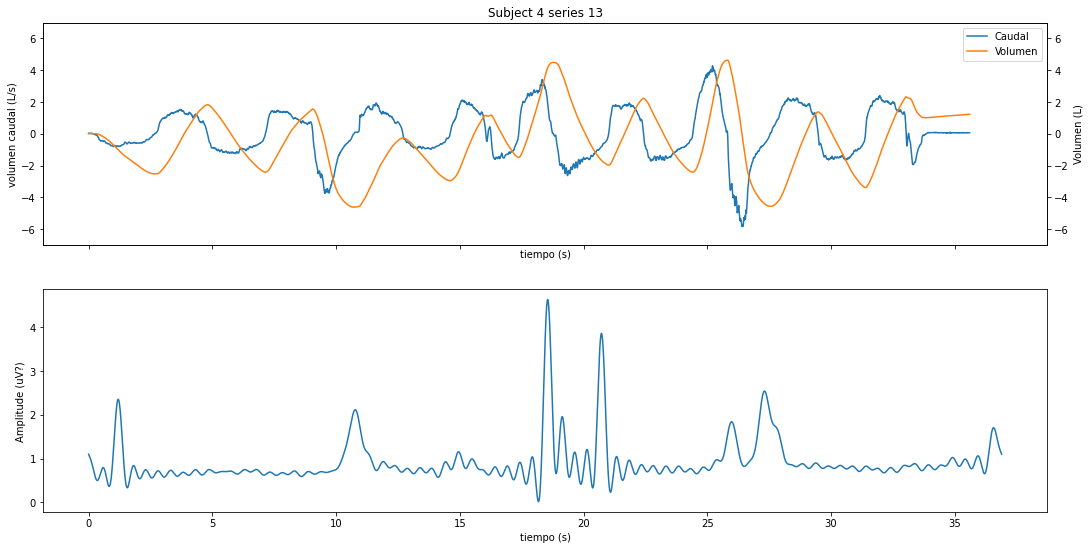

In [16]:
spiro_emg (4,13,low_cut=2)

### Subject 5:

/var/folders/xc/z05tb2yj5_s30q5tlm9f2xs40000gn/T/ipykernel_8830/2870609375.py:4: WavFileWarning: Reached EOF prematurely; finished at 3576876 bytes, expected 14307372 bytes from header.
  samplerate, data = wavfile.read('S'+str(subject)+'_EMG.wav')


40.553650793650796


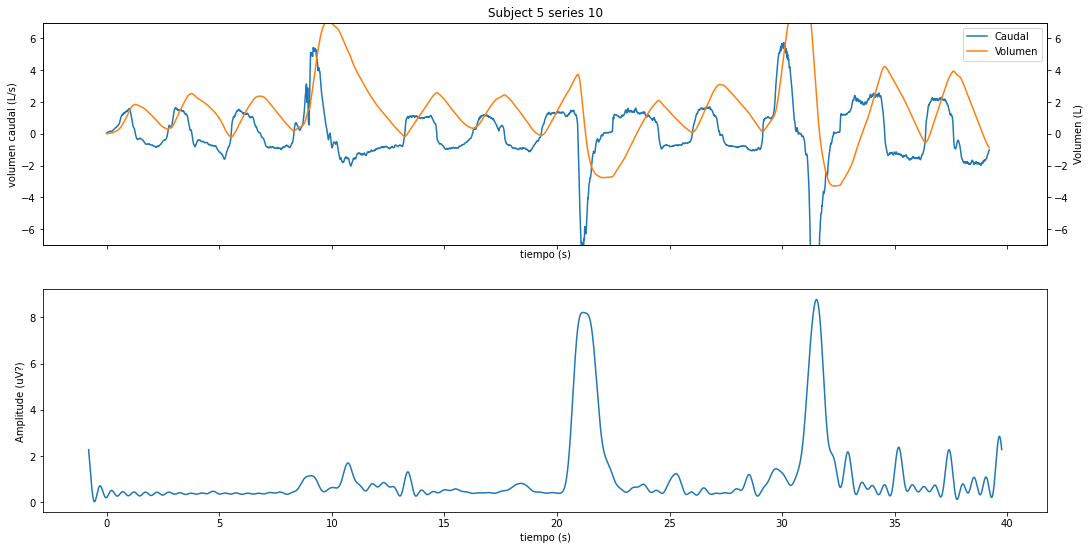

In [17]:
spiro_emg (5,10,emg_offset=-0.8)

## Volumes and capacities
The volumes and capacities of a subject and their proportions are particularly relevant to diagnose pulmonar diseases such as COPD and lung fibrosis. The main pulmonar volumes and capacities can be observed in the follwing graph:

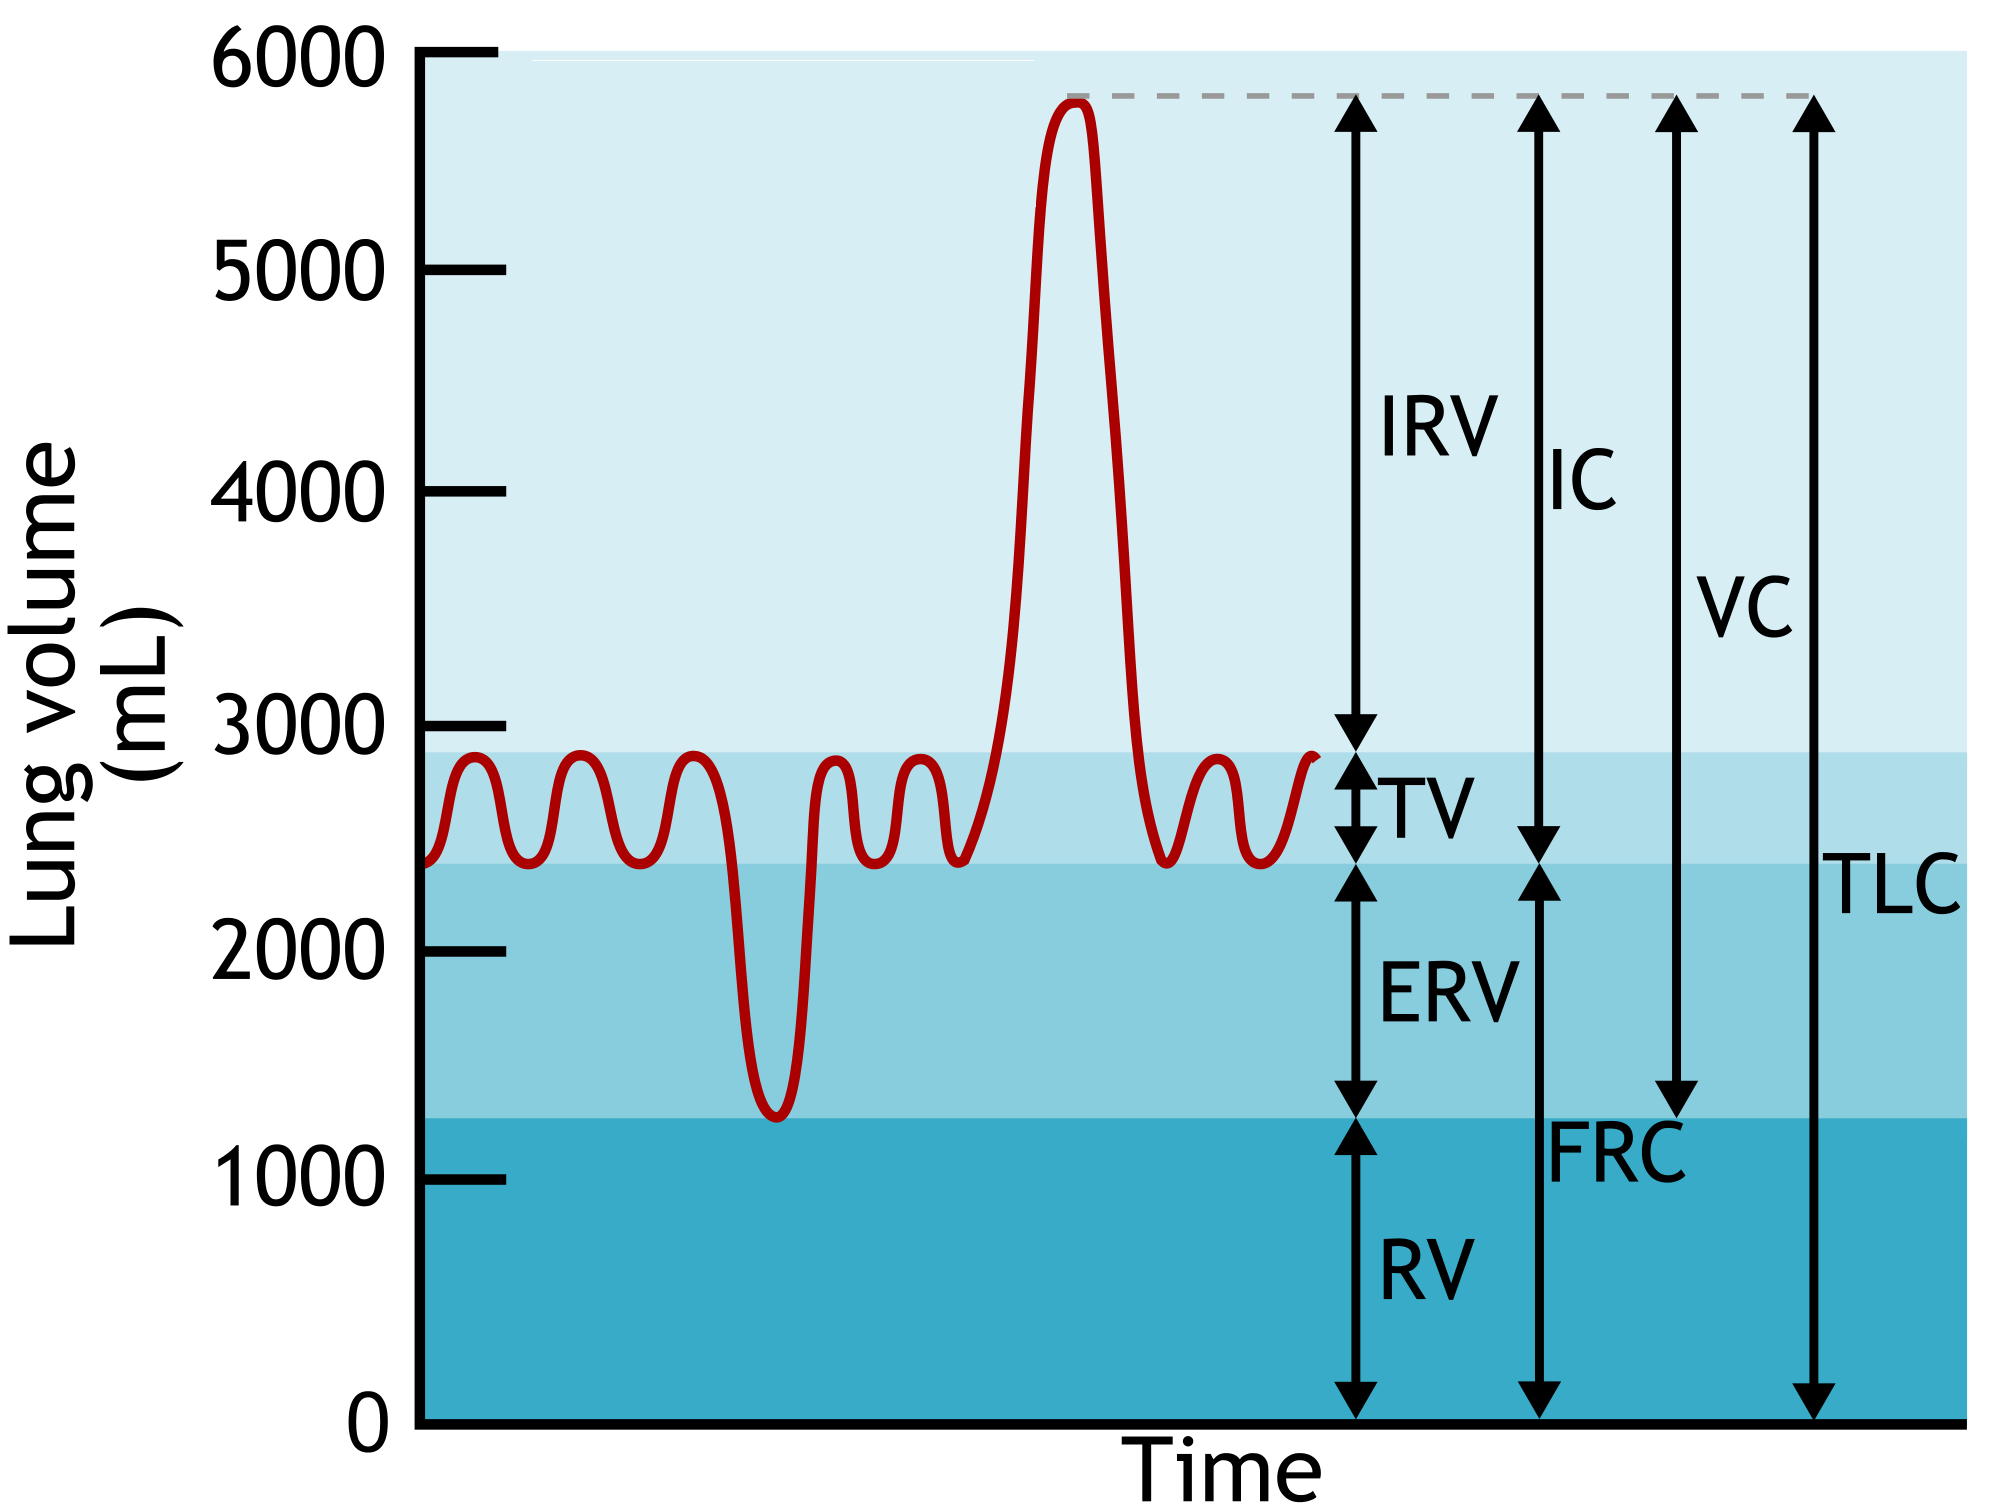

Remember that the spiromtry obtains volumes from the air flow that goes through the sensor. This means that the reserve volume(RV) can't be obtained directly. The same happens with the pu,monar capacities that include the reserve volume(FRC and TLC). With the spirometric data we can obtain the inspiratory reserve volume(IRV), tidal volume (TD) and expiratory reserve volume (ERV). To measure the reserve volume a pletismography would be necessary. 

To get this volumes we must first get local maxima and local mininum points from the volume plots. The protocol for each trial of spirometry is the following:
* Two normal breaths
* One deep exhalation
* Two normal breaths
* One deep inhalation
* Two normal breaths
* One deep exhalation followed boane deep inhlation

In some cases this procedure was made with some modifications, however the general structure is mantained (exhalation and inhalation might be switched). 

To obtain the critical values we will use a simple function that compares each point to the previous and the next value. This should work because the volume plot is soft and doesn't have too much noise.

In [18]:
def critical(b,a):
    # minimum values 
    m=[[],[]]
    # maximum values
    M=[[],[]]
    
    # start index
    i=1
    
    #Algorithm to go over the arrays
    while i<len(a)-1:
        
        #If minimum:
        if a[i]<a[i-1]:
            if a[i]<a[i+1]:
                index=np.argmin(a[i:i+50])
                m[0].append(b[i+index])
                m[1].append(a[i+index])
                #We don't expect to fin another maximum in the next 1 s after 
                i+=50
            else:
                i+=1
                
        #If maximum: 
        elif a[i]>a[i-1]:
            if a[i]>a[i+1]:
                index=np.argmax(a[i:i+50])
                M[0].append(b[i+index])
                M[1].append(a[i+index])
                #We don't expect to fin another maximum in the next 1 s after 
                i+=50
            else:
                i+=1
        else:
            i+=1

    #ignore first and last values to avoid broder artifacts
    m[0]=m[0][1:-1]
    m[1]=m[1][1:-1]
    M[0]=M[0][1:-1]
    M[1]=M[1][1:-1]
    return m,M

In [19]:
def spiro_critical (subject,series,low_cut=2): 
    # open files
    spiro=pd.read_csv("S"+str(subject)+"_spirometry.csv")
    
    # Calculate the number of series in the file
    n=int(np.shape(spiro)[1]/3)
    
    # Find critical values
    m,M =critical(spiro.iloc[:,0+((series-1)*3)],spiro.iloc[:,3*series-1])
    
    # Plot the data 
    fig=plt.figure(figsize=(18,5))
    plt.plot(spiro.iloc[:,3*series-3],spiro.iloc[:,3*series-1])
    #plot suggested threshold 
    plt.plot([0,40],[2.5,2.5])
    plt.plot([0,40],[-1,-1])
    plt.scatter(m[0],m[1])
    plt.scatter(M[0],M[1])
    plt.xlabel('tiempo (s)')
    plt.ylabel('volumen caudal (L/s)')
    plt.title("Subject "+str(subject)+" series "+str(series))
    plt.show()
    return m,M

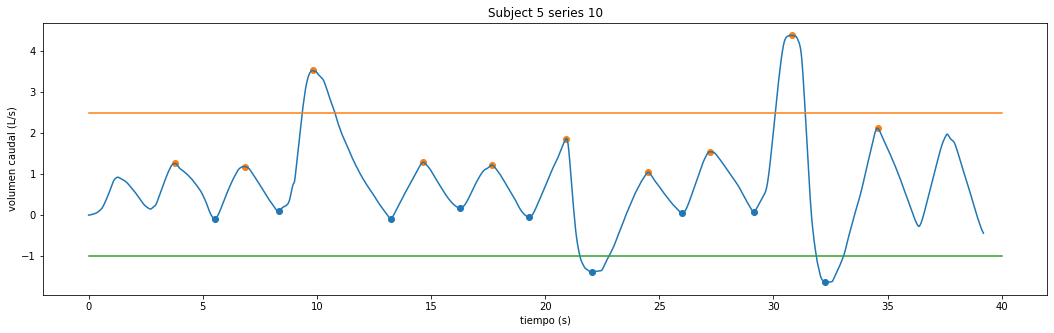

In [20]:
m,M=spiro_critical (5,10,low_cut=2)

As it can be observed in the previous plot, the algorithm seems to be working fine. Now we will have to clasify each critical point. The highest one will correspond to the volume at which forced ihalation is achived. The lowest one will correspond to the point at which forced exhalation is achived. The second most extreme points will be ignored. The rest will be averaged to obtain inhalation and exhalation volumes. 

In [21]:
def spiro_vols(subject,series): 
    # open files
    spiro=pd.read_csv("S"+str(subject)+"_spirometry.csv")
    
    # Find critical values
    m,M =critical(spiro.iloc[:,3*series-3],spiro.iloc[:,3*series-1])
    
    #new minimum array without forced exhalation
    m_td=[[],[]]
    
    fe_i=np.argmin(m[1])
    f_exhalation=m[1][fe_i]
    
    m_td[0]=np.delete(m[0],fe_i)
    m_td[1]=np.delete(m[1],fe_i)
    
    fe_i=np.argmin(m_td[1])
    m_td[0]=np.delete(m_td[0],fe_i)
    m_td[1]=np.delete(m_td[1],fe_i)
    
    exhalation=np.mean(m_td[1])
    
    #new minimum array without forced inhalation
    M_td=[[],[]]
    
    fi_i=np.argmax(M[1])
    f_inhalation=M[1][fi_i]
    
    M_td[0]=np.delete(M[0],fi_i)
    M_td[1]=np.delete(M[1],fi_i)
    
    fi_i=np.argmax(M_td[1])
    M_td[0]=np.delete(M_td[0],fi_i)
    M_td[1]=np.delete(M_td[1],fi_i)
    
    inhalation=np.mean(M_td[1])
    
    # Plot the data 
    fig, ax1 = plt.subplots(figsize=(18,5))
    ax1.plot(spiro.iloc[:,3*series-3],spiro.iloc[:,3*series-1])
    #plot suggested threshold 
    print(np.max(spiro.iloc[:,3*series-3]))
    ax1.plot([0,np.max(spiro.iloc[:,3*series-3])],np.ones(2)*inhalation)
    ax1.plot([0,np.max(spiro.iloc[:,3*series-3])],np.ones(2)*f_inhalation)
    ax1.plot([0,np.max(spiro.iloc[:,3*series-3])],np.ones(2)*exhalation)
    ax1.plot([0,np.max(spiro.iloc[:,3*series-3])],np.ones(2)*f_exhalation)
    ax1.scatter(m[0],m[1])
    ax1.scatter(M[0],M[1])
    ax1.set_xlabel('tiempo (s)')
    ax1.set_ylabel('volumen caudal (L/s)')
    ax1.set_title("Subject "+str(subject)+" series "+str(series))
    ax2=ax1.twinx()
    ax2.set_ylabel('Volumen (L)')
    ax2.set_ylim(-3,5)
    ax1.set_ylim(-3,5)
    #ax1.show()
    
    #Create a dictionary to save the volumes
    volumes={"IRV":f_inhalation-inhalation ,"TV":inhalation-exhalation ,"ERV":exhalation-f_exhalation, 
             "IC": f_inhalation-exhalation, "VC":f_inhalation-f_exhalation}
    return volumes

39.2


{'IRV': 2.94154704040625,
 'TV': 1.4250805615927071,
 'ERV': 1.6614933745910427,
 'IC': 4.366627601998957,
 'VC': 6.0281209765899995}

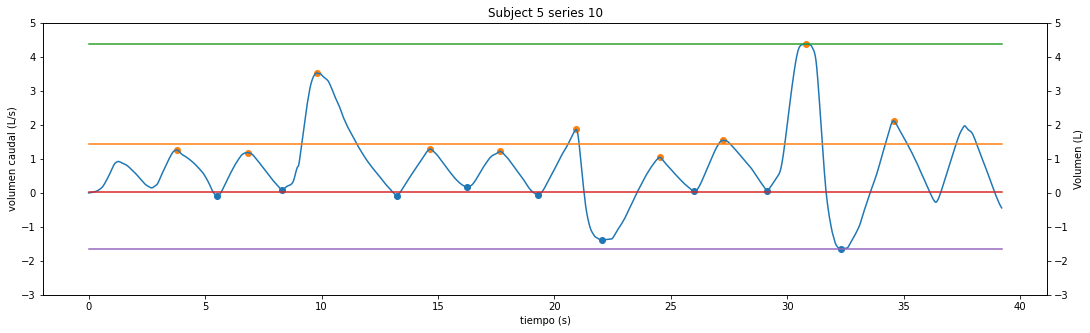

In [22]:
spiro_vols(5,10)

35.6


{'IRV': 1.6585624354641668,
 'TV': 1.878091050194167,
 'ERV': 1.0893057177516663,
 'IC': 3.5366534856583334,
 'VC': 4.62595920341}

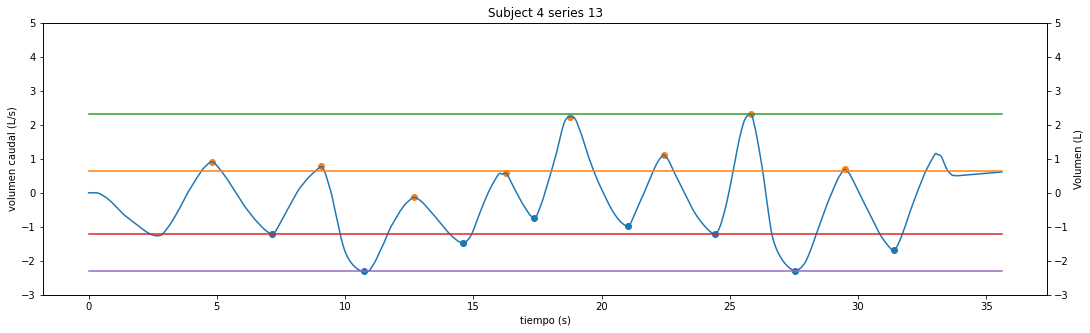

In [23]:
spiro_vols(4,13)

28.01


{'IRV': 1.304823460547,
 'TV': 0.8896379509951142,
 'ERV': 1.0635411793678857,
 'IC': 2.194461411542114,
 'VC': 3.25800259091}

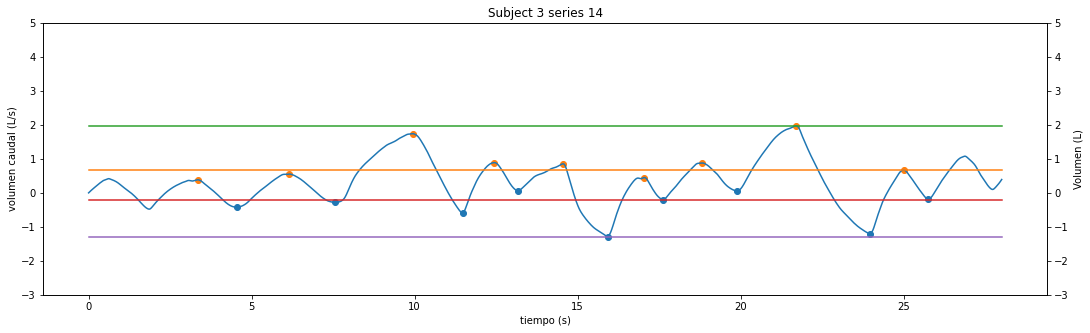

In [24]:
spiro_vols(3,14)

## EMG vs spirometry

In [33]:
def EMG_amp(subject,series,low_cut=2,emg_offset=0): 
    # open files
    spiro=pd.read_csv("S"+str(subject)+"_spirometry.csv")
    samplerate, data = wavfile.read('S'+str(subject)+'_EMG.wav')
    
    # Calculate the number of series in the file
    n=int(np.shape(spiro)[1]/3)
    
    # Create a time array
    length = data.shape[0] / samplerate
    time = np.linspace(0.+emg_offset, length+emg_offset, data.shape[0])
    
    # Correction of EMG
    data=abs(data)
    
    #FFT to data
    data_fft=np.fft.rfftn(data)
    
    #Finding the baseline
    baseline_fft=data_fft[0]
    baseline=np.zeros(len(data_fft))
    baseline[0]=np.real(baseline_fft)
    baseline_f=np.fft.irfftn(baseline)
    
    # High-pass filter
    for i in range(int(low_cut*length), len(data_fft)):
        data_fft[i]=0
        
    #Reconstructing the data
    data_2=np.fft.irfftn(data_fft)
    #sf=max([max(-spiro.iloc[:,1+((series-1)*3)]), max(2*spiro.iloc[:,2+((series-1)*3)])])/max(data_2)
    
    # Set threshold of activation
    ap=[]
    threshold=np.max(data_2)-0.3*(np.max(data_2)-np.min(data_2))
    act=False
    for i in range(0,len(data_2)):
        if act==False:
            if data_2[i]>threshold:
                act=True
                start=i
        if act==True:
            if data_2[i]<threshold:
                act=False
                ap.append([start,i])
                
    # Find the spike
    spikes_env=[[],[]]
    for i in range(0,len(ap)):
        spikes_env[0].append(time[ap[i][0]+np.argmax(data_2[ap[i][0]:ap[i][1]])])
        spikes_env[1].append(np.max(data_2[ap[i][0]:ap[i][1]]))
        
    # Find the spike
    spikes=[[],[]]
    for i in range(0,len(ap)):
        spikes[0].append(time[ap[i][0]+np.argmax(data[ap[i][0]:ap[i][1]])])
        spikes[1].append(np.max(data[ap[i][0]:ap[i][1]]))
        
    # Find the spike
    flow=[[],[]]
    for i in range(0,len(ap)):
    
        flow[0].append(
            spiro.iloc[
                int(100*(time[ap[i][0]]+emg_offset)
                    )-100+np.argmax(
                        spiro.iloc[
                            int(
                                100*(time[ap[i][0]]+emg_offset)
                            )-100:
                            int(
                                100*(time[ap[i][1]]+emg_offset)
                            )+100,3*series-2]
                    ),0+(3*series-3)
            ]
        )
        flow[1].append(np.max(spiro.iloc[int(100*(time[ap[i][0]]-emg_offset))-100:int(100*(time[ap[i][1]]-emg_offset))+100,1+((series-1)*3)]))
    
    # Plot the data 
    fig, axs = plt.subplots(nrows=5, ncols=1, sharex=False, sharey=False, figsize=(18,22)) 
    
    axs[0].plot(spiro.iloc[:,0+((series-1)*3)],-spiro.iloc[:,1+((series-1)*3)],label="Caudal")
    axs[0].plot(spiro.iloc[:,0+((series-1)*3)],2*spiro.iloc[:,2+((series-1)*3)],label="Volumen")
    axs[0].legend()
    axs[0].axvspan(time[ap[0][0]],time[ap[0][1]],color="red",alpha=0.05)
    axs[0].axvspan(time[ap[1][0]],time[ap[1][1]],color="red",alpha=0.05)
    axs[0].scatter(flow[0],flow[1])
    axs[0].set_xlabel('tiempo (s)')
    axs[0].set_ylabel('volumen caudal (L/s)')
    axs[0].set_title("Subject "+str(subject)+" series "+str(series))
    ax2=axs[0].twinx()
    ax2.set_ylabel('Volumen (L)')
    ax2.set_ylim(-11,11)
    axs[0].set_ylim(-11,11)
    
    axs[1].plot(time, data_2, label="EMG")
    axs[1].plot(time, baseline_f, label="Baseline")
    axs[1].plot([time[0],time[-1]],[threshold,threshold],label="Threshold")
    axs[1].axvspan(time[ap[0][0]],time[ap[0][1]],color="red",alpha=0.05)
    axs[1].axvspan(time[ap[1][0]],time[ap[1][1]],color="red",alpha=0.05)
    axs[1].scatter(spikes_env[0],spikes_env[1])
    axs[1].set_xlabel('tiempo (s)')
    axs[1].set_ylabel('Amplitude (uV?)')
    
    axs[2].plot(time, data, label="EMG")
    axs[2].axvspan(time[ap[0][0]],time[ap[0][1]],color="red",alpha=0.05)
    axs[2].axvspan(time[ap[1][0]],time[ap[1][1]],color="red",alpha=0.05)
    axs[2].scatter(spikes[0],spikes[1])
    axs[2].set_xlabel('tiempo (s)')
    axs[2].set_ylabel('Amplitude (uV)')
    
    axs[3].scatter(flow[1],spikes_env[1])
    axs[3].set_xlabel('caudal (L/s)')
    axs[3].set_ylabel('Amplitude (uV)')
    axs[3].set_xlim([0,11])
    
    axs[4].scatter(flow[1],spikes[1])
    axs[4].set_xlabel('caudal (L/s)')
    axs[4].set_ylabel('Amplitude (uV)')
    axs[4].set_xlim([0,11])

/var/folders/xc/z05tb2yj5_s30q5tlm9f2xs40000gn/T/ipykernel_8830/567654856.py:4: WavFileWarning: Reached EOF prematurely; finished at 3576876 bytes, expected 14307372 bytes from header.
  samplerate, data = wavfile.read('S'+str(subject)+'_EMG.wav')


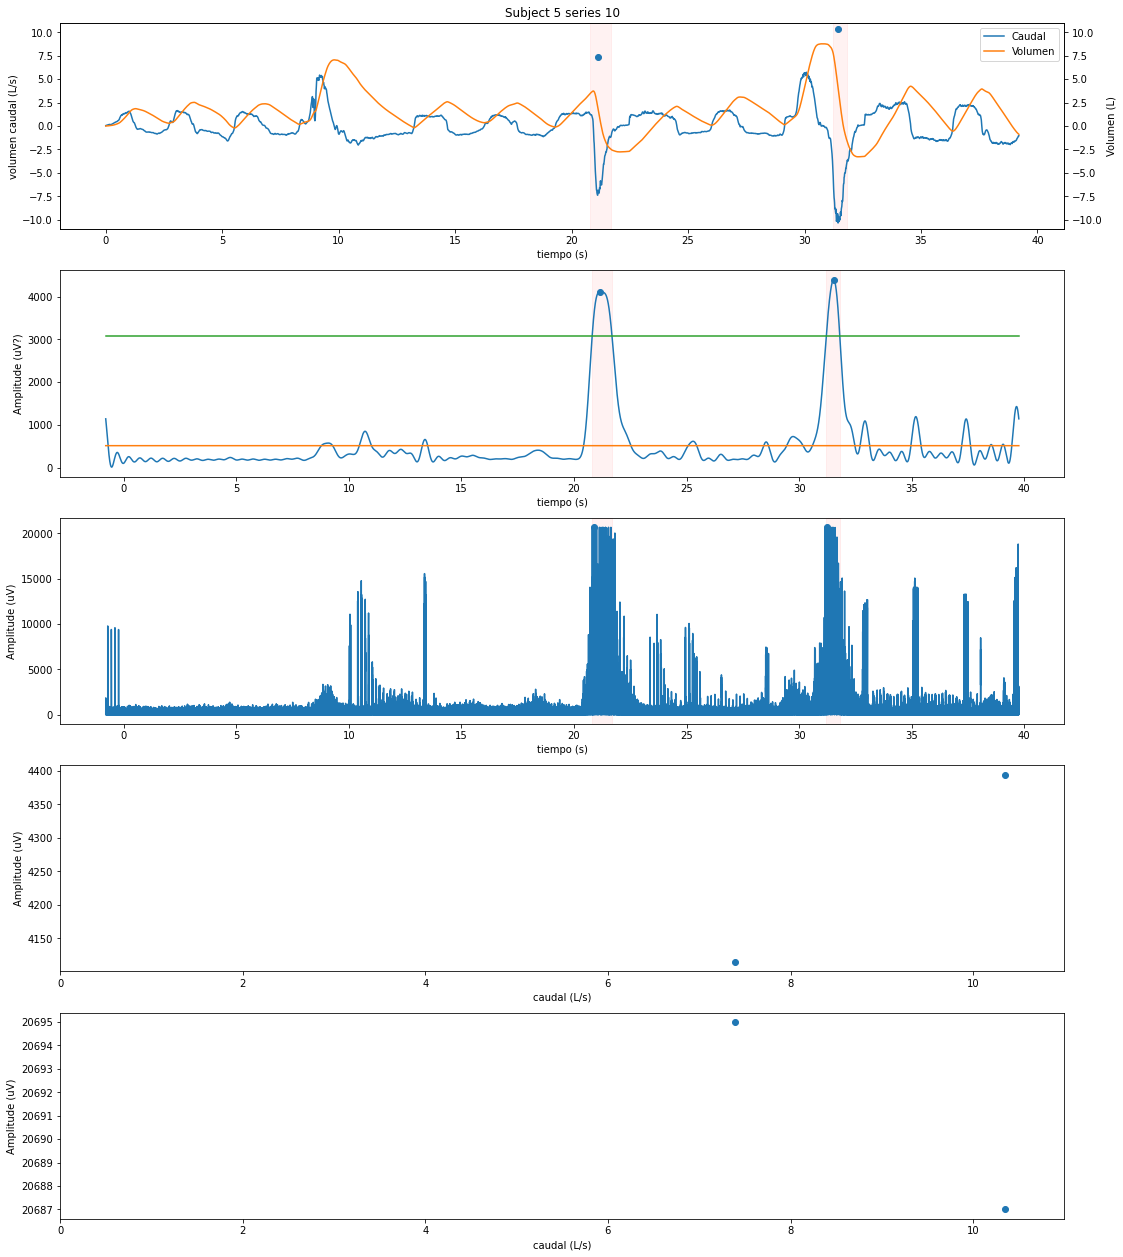

In [34]:
EMG_amp(5,10,emg_offset=-0.8,low_cut=2)

En las graficas se puede observar que el programa detecta adecuadamente los picos en los segmentos deseados. En la dispersión de las dos exhalaciones se puede ver que un mayor flujo va de la mano con una mayor amplitud en el potencial de acción de los músculos abdominales. 

Algo curioso que no coincide con lo que estabamos esperando es que esta tendencia del flujo contra la amplitud no se presenta en la disperción con el EMG crudo(no envolvente). Esto se puede deber a que el electrodo se satura en la exhalación. Esto hace que la diferencia entre las dos amplitudes no representen adecuadamente la actividad muscular.

Encontrar baseline
Añadir eje en plot[0]
Revisar fechas
